<a href="https://colab.research.google.com/github/nana-hyun/Machine-Learning/blob/master/ML%20%26%20DL%20Basic/Lec%2000%20~%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML

* Supervised learning
    * learning with labeled examples - training set
    * Image labeling, Email spam

* Unsupervised learning
    * un-labeled data ; clustering

**Training data set**

supervised learning에서 ML 훈련시킬 때 사용하는 dataset

* regression : predicting final exam score

* binary classification : pass/non-pass

* multi-label classification : letter grade(A, B, C and F)



# Tensorflow

* python 사용

node에서 수학적 연산을 하고, edge를 통해 data array들이 node 사이를 이동할 수 있다.

* data arrays : tensors 



In [ ]:
import tensorflow as tf

In [ ]:
hello = tf.constant("Hello, Tensorflow!")

## Session

In [ ]:
#  import tensorflow.compat.v1 as tf
#  tf.compat.v1.disable_eager_execution() or tf.disable_v2_behavior()  tensorflow v2에서는 더이상 session을 지원하지 않음

sess = tf.Session()

print(sess.run(hello))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
tf.print(hello)

Hello, Tensorflow!


In [ ]:
print(hello)

tf.Tensor(b'Hello, Tensorflow!', shape=(), dtype=string)


In [ ]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
node1 = tf.constant(17.5)
node2 = tf.constant(5.0)

In [ ]:
node3 = tf.add(node1, node2)

In [ ]:
print(node3)

Tensor("Add_2:0", shape=(), dtype=float32)


In [ ]:
sess = tf.Session()
sess.run(node3)

22.5

## Placeholder

In [ ]:
a = tf.placeholder(tf.float32)   # tensorflow v2에서는 더이상 placeholder를 지원하지 않음

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
@tf.function

def adder(a, b):
    return a + b

A = tf.constant(1)
B = tf.constant(2)
print(adder(A, B))

C = tf.constant([1, 3])
D = tf.constant([2, 4])
print(adder(C, D))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([3 7], shape=(2,), dtype=int32)


In [19]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b
sess = tf.Session()
print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]}))

7.5
[3. 7.]


# Linear Regression

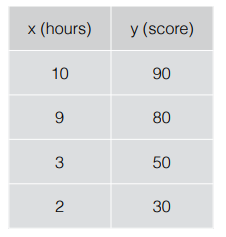

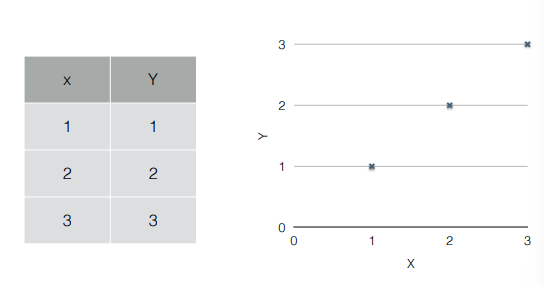

데이터들을 선형적으로 나타낼 수 있다.

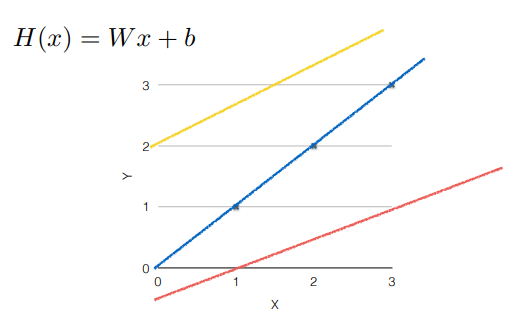

H(x) = Wx + b

로 나타낼 수 있으며, 어떤 Hypothesis function이 dataset을 가장 잘 설명하는지 찾아야 한다.

이를 위해 

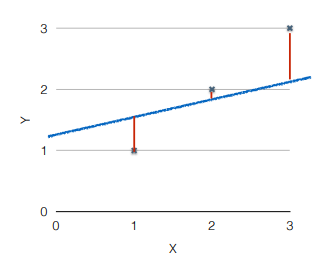

원래의 data들과 hypothesis의 차이를 이용해 가장 적합한 hypothesis를 구한다.

image.png

제곱을 한 이유는 음의 값이 나오지 않기 때문이기도 하고, 에러가 큰 것에 대해 더 큰 패널티를 부여할 수 있기 때문이다.

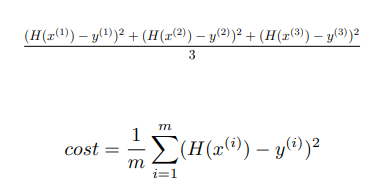

이렇게 각각의 에러의 합의 평균을 구한 것을 cost function (loss function)이라고 한다.

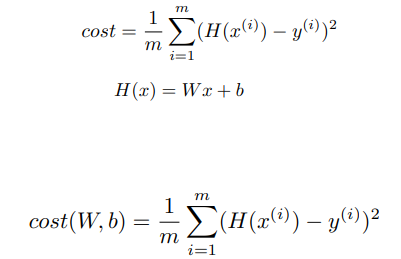

우리의 목표는 이러한 cost를 최소화하여 가장 적합한 hypothesis를 찾는 것이다.

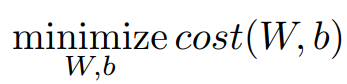

## Lab1

In [2]:
# Lab 2 Linear Regression
import tensorflow as tf
tf.compat.v1.set_random_seed(777)  # for reproducibility


In [3]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]


In [24]:

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random.normal([1]), name="weight")  #random_normal in v1
b = tf.Variable(tf.random.normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))


In [28]:

# optimizer

train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train2 = tf.keras.optimizers.SGD(learning_rate=0.01).minimize(cost,var_list=[W,b],tape=tf.GradientTape())

ValueError: ignored

In [30]:
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

0 35.017033 [-1.6945345] [-0.10426212]
20 0.423318 [0.40163815] [0.7670416]
40 0.09995329 [0.6172971] [0.8134919]
60 0.088199586 [0.65314] [0.78311616]
80 0.08008092 [0.6711415] [0.74706066]
100 0.07273054 [0.6867585] [0.7120228]
120 0.06605503 [0.7014952] [0.67856705]
140 0.059992224 [0.7155254] [0.6466775]
160 0.054485917 [0.72889465] [0.6162861]
180 0.04948498 [0.74163556] [0.58732295]
200 0.044943046 [0.75377774] [0.5597209]
220 0.040818002 [0.7653493] [0.5334161]
240 0.037071545 [0.776377] [0.50834745]
260 0.03366897 [0.7868865] [0.484457]
280 0.0305787 [0.7969021] [0.46168926]
300 0.027772062 [0.806447] [0.4399916]
320 0.025223037 [0.8155432] [0.4193136]
340 0.02290797 [0.824212] [0.39960742]
360 0.020805378 [0.83247346] [0.38082728]
380 0.018895762 [0.84034663] [0.36292976]
400 0.017161438 [0.8478498] [0.34587336]
420 0.015586293 [0.8550002] [0.32961854]
440 0.014155712 [0.86181474] [0.31412765]
460 0.012856446 [0.86830896] [0.2993648]
480 0.011676431 [0.8744979] [0.28529578]
50

## Lab 2

In [46]:
# placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/36693740/
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

In [ ]:

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run(
            [train, cost, W, b], feed_dict={X: [1, 2, 3], Y: [1, 2, 3]}
        )
        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

    # Testing our model
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict={X: [2.5]}))
    print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

In [ ]:
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())  

    # Fit the line with new training data
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run(
            [train, cost, W, b], feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]},
        )
        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

    # Testing our model
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict={X: [2.5]}))
    print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

## minimize cost

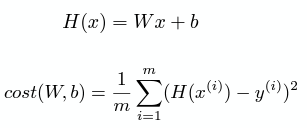

이 식을 조금 더 단순화할 수 있다.

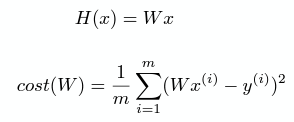

이렇게 W에 관한 식으로 표현할 수 있다.

W의 값에 따라 cost 값이 달라지게 된다.

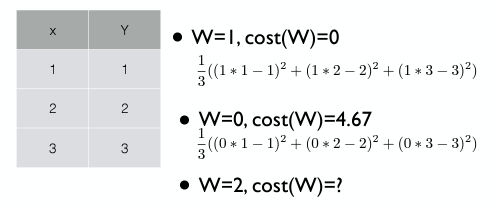

W = 2 일때도, cost(W)는 4.67이 된다.

이를 W-cost(W) 그래프로 그려보면 다음과 같다.

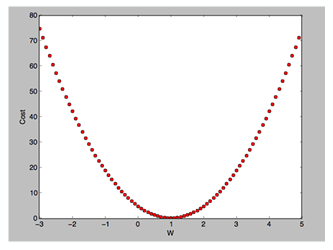

cost를 최소화할 수 있는 방법은 무엇이 있을까?

- Gradient descent algorithm

:경사 하강법을 이용하고자 한다.

**work**

* Start with initial guesses
    - 아무 값에서 시작한다. (random)
    - W를 변화시키면서, cost값을 조금씩 줄여나간다.

* 파라미터를 변화시킬 때마다, 가능한 최소로하는 cost 값을 가지는 기울기를 선택한다.

* 이를 반복한다.

* local minimum에 수렴할 때까지 반복한다.

* 어디서 시작하느냐에 따라 끝나는 최소지점이 달라질 수 있다.

**formal definition**

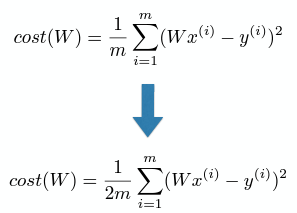

식으로 보았을 때, 가장 최소로하는 값을 구하기 위해 기울기를 알아야 하는데, 이때 미분을 활용해야한다.

미분할 때 계산을 조금 더 깔끔하게 해주기 위해 1/2를 곱한다. (미분할 대상이 이차식이므로)

우리는 W를 결정할 때, W의 크기가 줄어드는 방향으로 진행해야 할것 이다.

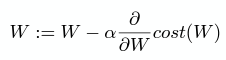

식을 보면, 다음 결정될 W는 기존의 W에서 cost함수를 W로 미분한 값(기울기)에 learning rate를 곱한 값을 빼서 결정을 한다.


미분한 값이 음수라면, 기존의 W에서 더해진 값인(음수끼리의 곱이므로) W가 조금 증가하는 방향으로 진행 될 것이고, 미분한 값이 양수라면, 기존의 W에서 뺀 값인(음수 * 양수 이므로) W가 조금 감소하는 방향으로 진행 될 것이다.

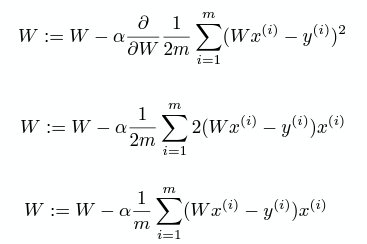

식은 위와 같다.

위와 같이 단순히 local minimum이 하나라 global minimum이 충족되는 경우는 단순하지만, 그렇지 않은 경우가 있을 수 있다.

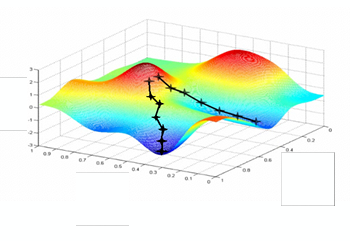

위 그림처럼, 처음 시작 위치를 어디로 잡느냐에 따라 전혀 다른 결과를 내기도 한다.

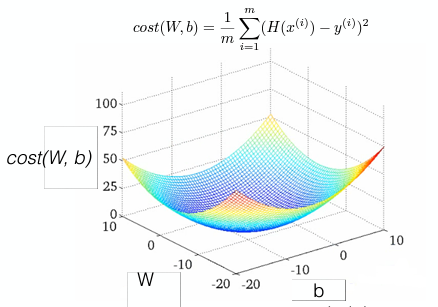

반면에, 위와 같이 좋은 모양을 가지는 function을 convex function이라고 한다. 이 경우, 어떠한 점에서 시작해도 minimum은 하나의 값만 나온다. 우리는 이러한 function으로 cost함수가 만들어지는지 생각을 해야한다.

